# `nn` torch module

In [6]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import Parameter
import torch.nn.functional as F

In [7]:
# What is a 'Parameter'?
Parameter??

In [8]:
# What about a 'nn.Linear'?
nn.Linear??

In [9]:
# And 'F.linear'?
F.linear??

In [10]:
! pip install git+https://github.com/szagoruyko/pytorchviz
! brew install graphviz  # or ! sudo apt-get install graphviz

  Cloning https://github.com/szagoruyko/pytorchviz to /private/var/folders/6h/88qgq9d111953s5lmz1k7n1m0000gn/T/pip-xmlov20b-build
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
To reinstall 2.40.1, run `brew reinstall graphviz`


In [11]:
! which pip

/anaconda2/envs/CodasML/bin/pip


In [12]:
from collections import OrderedDict
from torchviz import make_dot, make_dot_from_trace

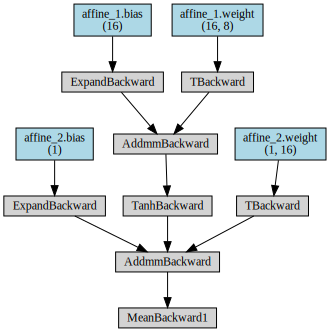

In [14]:
# Building a sequential net
model1 = nn.Sequential(OrderedDict([
    ('affine_1', nn.Linear(8, 16)),
    ('tanh', nn.Tanh()),
    ('affine_2', nn.Linear(16, 1)),
]))

x = torch.randn(1,8)
y1 = model1(x)

make_dot(y1.mean(), params=dict(model1.named_parameters()))

In [16]:
# Building a custom sequential net
class Model2(nn.Module):
    def __init__(self, n, d, K):
        super().__init__()
        self.affine_1 = nn.Linear(n, d)
        self.affine_2 = nn.Linear(d, K)
        
    def forward(self, x):
        input_ = x # hidden :p
        x = self.affine_1(x)
        x = F.tanh(x)
        x = self.affine_2(x)
        x += torch.mean(self.affine_1.weight) # hidden :p
        return x

model2 = Model2(8, 16, 1)

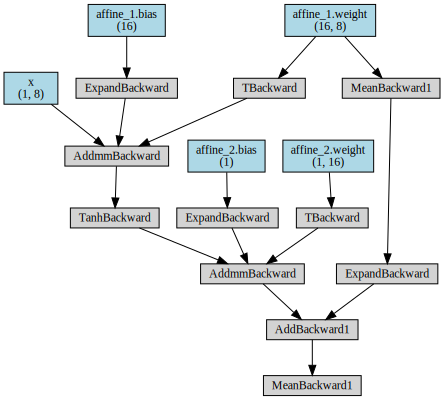

In [17]:
# x = torch.randn(1,8)
x = torch.randn(1,8, requires_grad=True)
y2 = model2(x)

# make_dot(y2.mean(), params=dict(model2.named_parameters()))
make_dot(y2.mean(), params=dict(list(model2.named_parameters()) + [('x', x)]))